# polynomial Linear Regression

In [1]:
import numpy as np

In [49]:
# for perabolic graph I want polunomial equation

# y = a0 + (a1 * x) + (a2 * x^2)

a0=2
a1=0.9
a2=0.8

x=5 * np.random.rand(200,1) -3 
y= a0 + (a1 * x) + (a2 * x**2) + np.random.randn(200,1)

#making my dataset by my own simply by using polynomial equation formula
#np.random.randn() adding some noise in the data for achive randomisation in other way yo avoid overfitting

In [22]:
print(x.shape)
print(y.shape)

(200, 1)
(200, 1)


In [28]:
print(x[:5])

[[ 1.66953407]
 [ 0.40595742]
 [ 0.99151735]
 [-2.15599587]
 [ 0.76107432]]


In [29]:
print(y[:5])

[[6.08133906]
 [2.61815567]
 [4.89326343]
 [3.64793403]
 [3.72053032]]


In [25]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

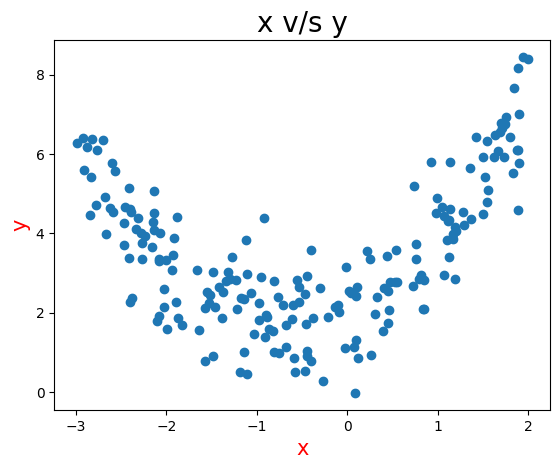

In [30]:
plt.scatter(x,y)
plt.title("x v/s y",size=20)
plt.xlabel("x", size=15, color='red')
plt.ylabel("y", size=15, color="red")

#graphical representation of dataset

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

#deviding dataset into training data and testing data

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 1)
(160, 1)
(40, 1)
(40, 1)


# Appling Simple Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#importing LinearRegression class of sci-kit learn and make the object of class 

In [35]:
lr.fit(x_train,y_train)

#model training

LinearRegression()

In [41]:
y_predict=lr.predict(x_test)
print(y_predict[:10])


#model testing

[[3.29026955]
 [4.14417841]
 [3.54607099]
 [2.8650548 ]
 [2.99661346]
 [3.84886104]
 [3.35170687]
 [3.40364265]
 [3.06733885]
 [4.07283643]]


In [38]:
print(y_test[:10])

[[0.46775594]
 [8.17241589]
 [1.90479725]
 [5.77043194]
 [5.05882532]
 [2.81983583]
 [1.93198668]
 [2.20699361]
 [2.26720975]
 [6.47297986]]


In [42]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

#evaluate our model using r2_score
#as r2_score value is high our model is that much good

0.10527152370215576

* **Here r2_score of our model is not good.**
* **Let's plot graph between predicted y and x to understant why is it so??**

Text(0, 0.5, 'prediction')

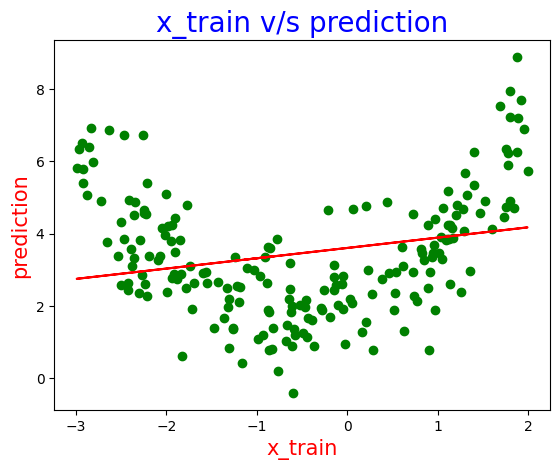

In [53]:
plt.plot(x_train,lr.predict(x_train),color="red")
plt.scatter(x,y,color='g')
plt.title("x_train v/s prediction",size=20,color="b")
plt.xlabel("x_train",size=15,color='r')
plt.ylabel("prediction",size=15,color='r')

#ploting predicted line in our dataset to visulise why our model behave badly

* **As you see our best fit line calculated by our model is not too good.**
* **It misses too many points**

* **For this reason polynomial Regrssion comes into the picture**

# Using Plynomial Simple Linear Regression

In [58]:
from sklearn.preprocessing import PolynomialFeatures
plr = PolynomialFeatures(degree=2,include_bias=True)

new_x_train=plr.fit_transform(x_train)
new_x_test=plr.fit_transform(x_test)

#explaination below

* We do not have any class that perform Plynomial Regression directly.
* And also we are going to use Linear Regression Class to achive Plynomial Regression

* But How, 

* We modify are data such a way that when we give that data to LinearRegression class it perform PlynomialRegression

* for that, we import PolynomialFeatures class of sci-kit learn.
* This class take 2 necessary perameters initially
1. degree of the cure(no of degree tells how may times our curve change it's slope)
2. include_bias=True/False (by default it is True)
> It can vary according to model performance or on the model developer, But yes it can affect model accuracy that's why it is important

* fit_transform() is the function of PlynomialFeatures class
* It transform our linear data into polynomial data

* Example, if I have x as input column
* if degree is 2 then it transform x in, 

1. if include_bias=True
# x => a0*x^2, a1*x, a2 

2. ifn include_bias=False
# x => a0*x^2, a1*x

* degree 2 means it generate 2nd degree polynomial

# 2x^3 + 3x^2 + 4x + 6 
* degree of above polynomial is 3
* highest power of x

In [59]:
print(new_x_train[0])

[ 1.         -0.81850275  0.66994675]


In [60]:
print(new_x_test[0])

[ 1.         -1.11310587  1.23900467]


**Now apply linear regression on out new x which contain polynomial values of degree 2**

In [61]:
lr=LinearRegression()

#creating object of LinearRegression calss

In [62]:
lr.fit(new_x_train,y_train)

#model training

LinearRegression()

In [64]:
y_predict=lr.predict(new_x_test)
print(y_predict)

#evaluate model

[[1.87794868]
 [6.73907229]
 [1.86138708]
 [4.69303123]
 [3.45017204]
 [3.46992871]
 [1.75902185]
 [1.71516811]
 [2.91973522]
 [5.7955049 ]
 [3.13362552]
 [4.03060598]
 [2.30111866]
 [1.87488385]
 [2.16969544]
 [3.83060435]
 [1.78285543]
 [3.48180944]
 [4.21951435]
 [3.45914705]
 [2.98615828]
 [5.4881123 ]
 [3.44288395]
 [1.7963995 ]
 [4.11478133]
 [6.26098943]
 [2.86828807]
 [2.08127806]
 [1.79384797]
 [2.03352275]
 [4.14108455]
 [1.75987122]
 [2.03211241]
 [2.90723469]
 [2.13398011]
 [3.21406455]
 [2.5144637 ]
 [4.19421928]
 [1.74480552]
 [4.63658781]]


In [65]:
r2_score(y_test,y_predict)

#evaluate moedel

0.7198822356359416

* ***You can see out r2_score rised form 0.1 to 0.7 means our model perform much better then before***
* ***Let's plot graph and see why r2_score is improved??***

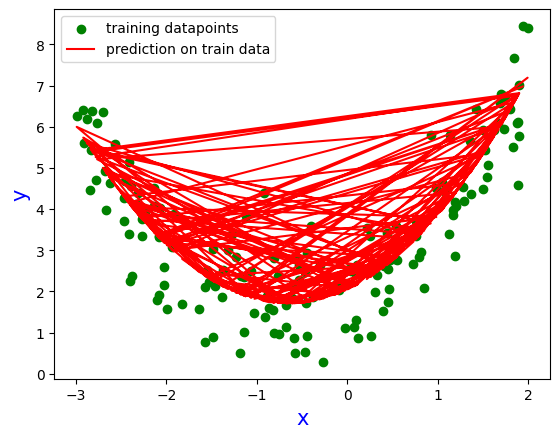

In [78]:
plt.scatter(x_train,y_train,color='g',label="training datapoints")
plt.plot(x_train,lr.predict(new_x_train),'r-',label="prediction on train data")
plt.xlabel('x',size=15,color='b')
plt.ylabel('y',size=15,color='b')
plt.legend()
plt.show()

#visulise line predicted by out model

* **You can see the graph is more accurate then before.**
* **you can also observe that as training goes on predicted line become more and more accurate.**